In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.3.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)

In [4]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Text(0.5, 1.0, 'Spam/ham Data Distribution')

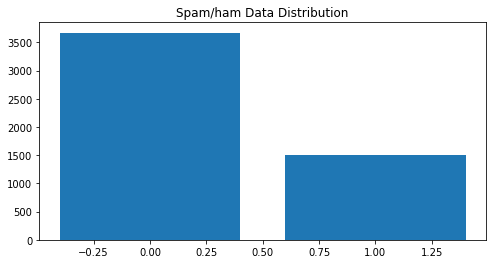

In [5]:
val_count = data.label_num.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Spam/ham Data Distribution")

In [6]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|Subject:|subject|[^A-Za-z0-9]+"

In [7]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [8]:
data.text = data.text.apply(lambda x: preprocess(x))

In [9]:
#pip install wordcloud

In [10]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [11]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 50

In [12]:
x = data['text']
y = data['label_num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 4136
Test Data size 1035


In [13]:
#train_data.head(10)

## TOKENIZER

In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43794


In [15]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (4136, 50)
Testing X Shape: (1035, 50)



## LSTM

In [16]:
#LSTM hyperparameters
n_lstm = 200
drop_lstm =0.2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [18]:
#vocab_size = 500 # As defined earlier
embeding_dim = 16
#drop_value = 0.2 # dropout
#n_dense = 24
#num_epochs = 30
#early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [19]:
#LSTM Spam detection architecture
#model1 = Sequential()
#model1.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(Dense(1, activation='relu'))

In [20]:
#model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [21]:
#num_epochs = 30
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
#history = model1.fit(x_train, train_data.label_num, epochs=num_epochs, validation_data=(x_test, test_data.label_num), verbose=2)

In [ ]:
# Create a dataframe
#metrics = pd.DataFrame(history.history)
# Rename column
#metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
#                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
#def plot_graphs1(var1, var2, string):
#    metrics[[var1, var2]].plot()
#    plt.title('LSTM Model: Training and Validation ' + string)
#    plt.xlabel ('Number of epochs')
#    plt.ylabel(string)
#    plt.legend([var1, var2])
#plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
#plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [22]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [23]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [24]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test),callbacks =[early_stop], verbose=2)

Epoch 1/30
130/130 - 20s - loss: 0.3119 - accuracy: 0.8598 - val_loss: 0.1135 - val_accuracy: 0.9614
Epoch 2/30
130/130 - 19s - loss: 0.0369 - accuracy: 0.9902 - val_loss: 0.1099 - val_accuracy: 0.9715
Epoch 3/30
130/130 - 19s - loss: 0.0494 - accuracy: 0.9903 - val_loss: 0.1542 - val_accuracy: 0.9675
Epoch 4/30
130/130 - 19s - loss: 0.0211 - accuracy: 0.9962 - val_loss: 0.1607 - val_accuracy: 0.9682


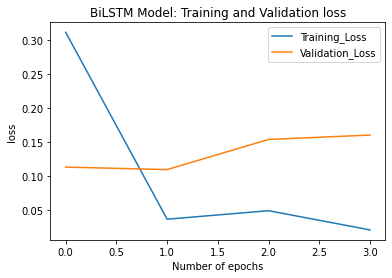

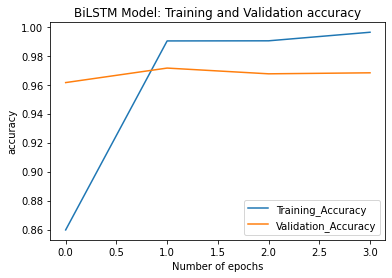

In [25]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [26]:
y_pred = model2.predict(x_test)
y_pred.shape

(1035, 50, 1)

In [31]:
def func(x):
    if x>0.5:
        return 1
    else:
        return 0

In [36]:
y_pred[0][0]

array([0.9822353], dtype=float32)

In [39]:
for i in range (len(y_pred)):
    for j in range (len(y_pred[i])):
        y_pred[i][j] = func(y_pred[i][j])

In [52]:
pred = []
for i in range (len(y_pred)):
    pred.append(int(y_pred[i].all()))

In [56]:
pred

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [55]:
len(pred)

1035

In [ ]:
from tensorflow.keras.models import load_model

#model2.save('bilstm.h5')